# Salary Prediction With Non-Linear Regression Models - Sena YILDIRIM

## I. Importing Essential Libraries

**Business Problem:** Develop a machine learning model to estimate the salaries of baseball players whose salary information and career statistics for 1986 are shared.

**Dataset History**

This dataset was originally taken from the StatLib library at Carnegie Mellon University. The dataset is part of the data used in the 1988 ASA Graphics Section Poster Session. Salary data originally from Sports Illustrated, April 20, 1987. 1986 and career statistics, Collier Books, Macmillan Publishing Company Retrieved from the 1987 Baseball Encyclopedia Update published by New York.

**About Dataset**
* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* CWalks: Number of walks during his career
* League: A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings('ignore')

## II. Exploratory Data Analysis ( EDA )

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
# Verifying it as a 'dataframe' object in pandas
type(df)

pandas.core.frame.DataFrame

In [4]:
# Preview data
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
# Dataset dimensions - (rows, columns)
df.shape

(322, 20)

In [6]:
# General information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
# Missing observations: How many missing value?
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [8]:
# Delete missing values
df = df.dropna()

In [9]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


## III. Data Visualization

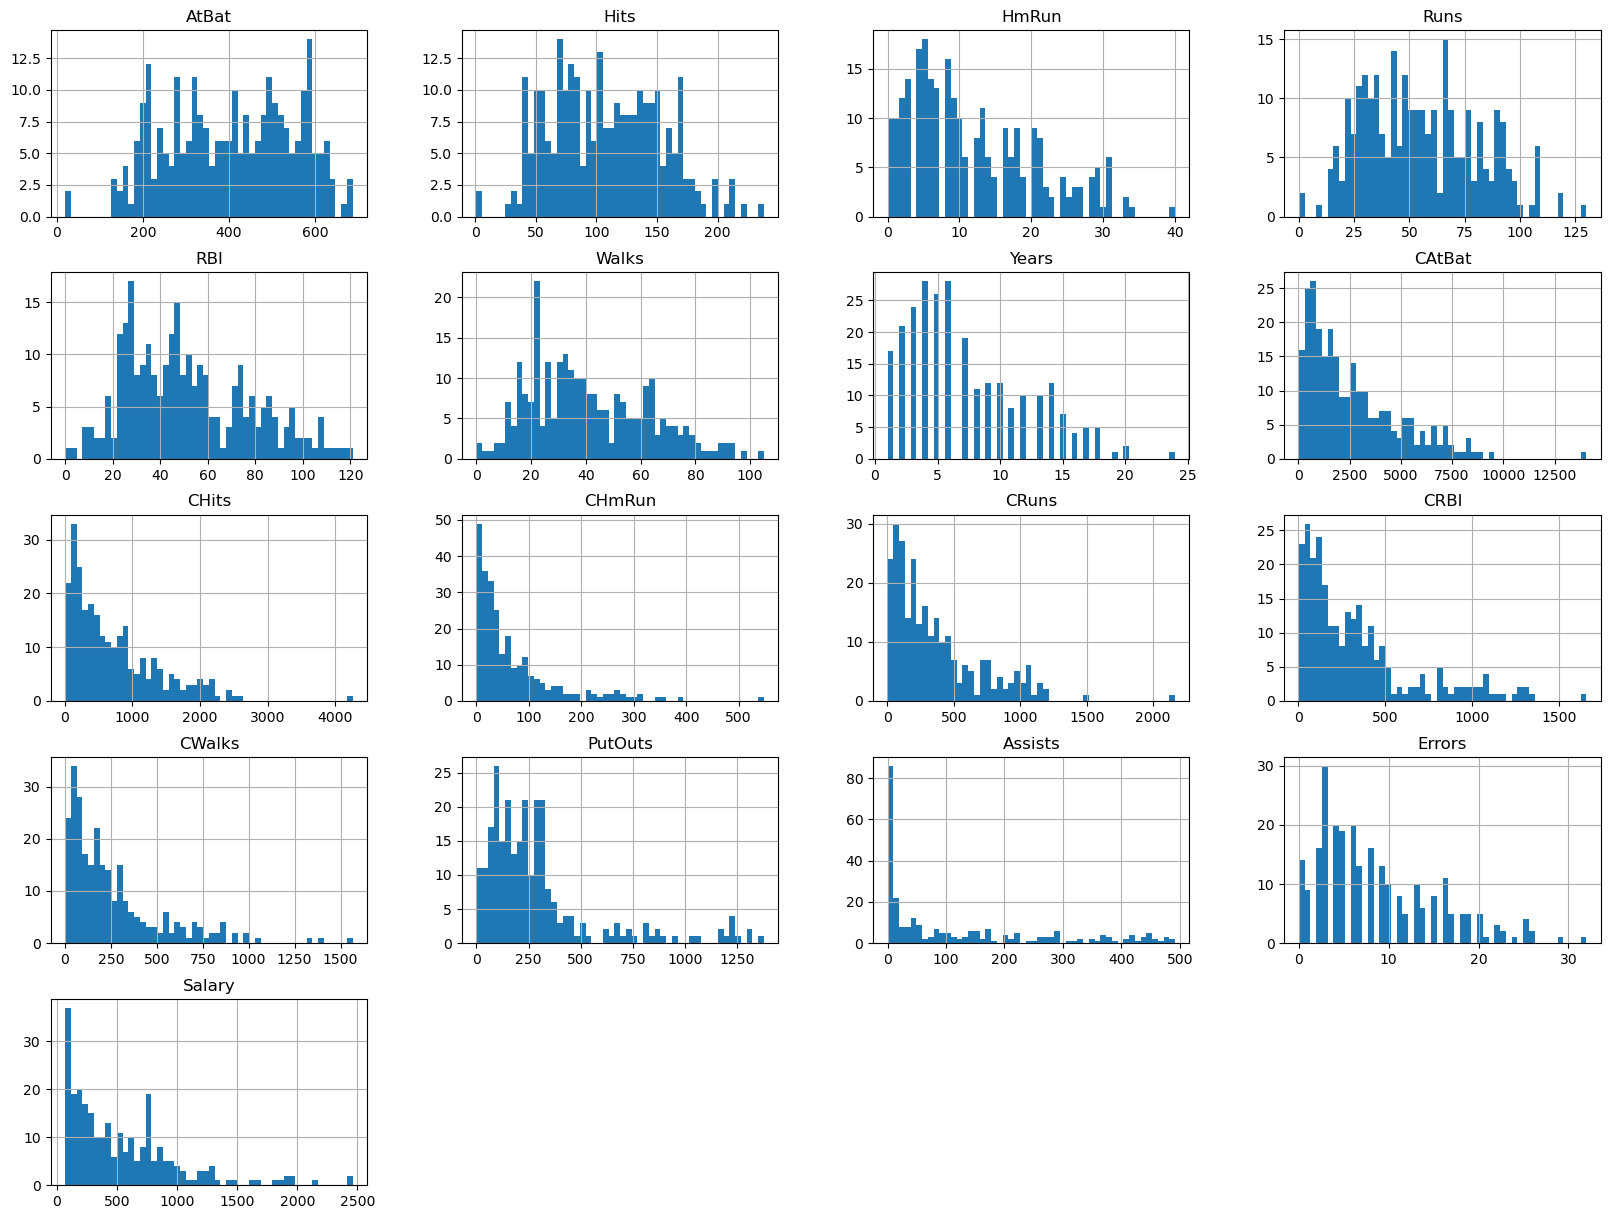

In [10]:
# Histogram of each feature
df.hist(bins=50,figsize=(20,15))
plt.show()

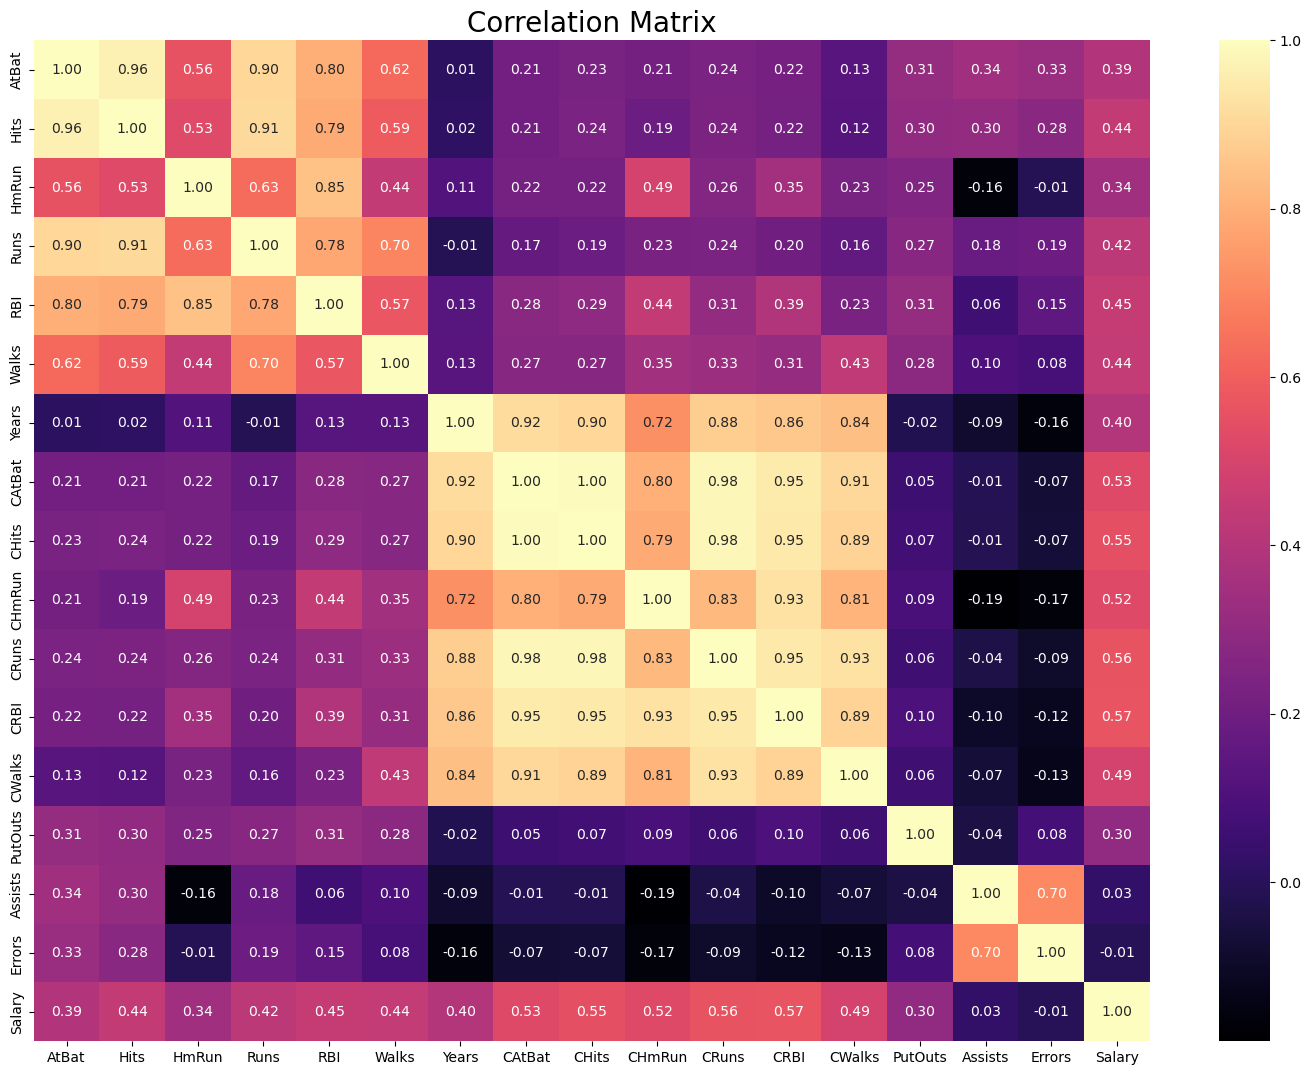

In [11]:
# Correlation Matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

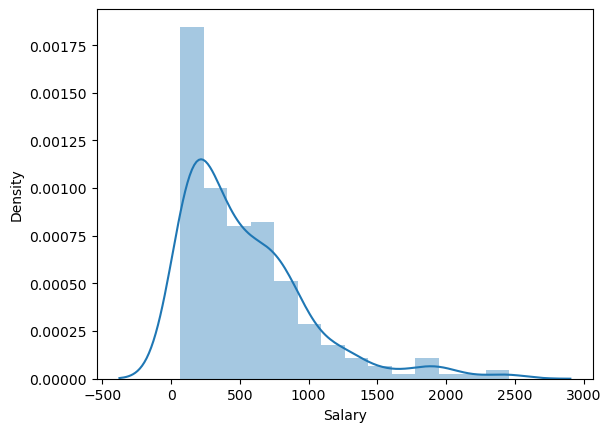

In [12]:
# Displot 
df["Salary"].describe()
sns.distplot(df.Salary)
plt.show()

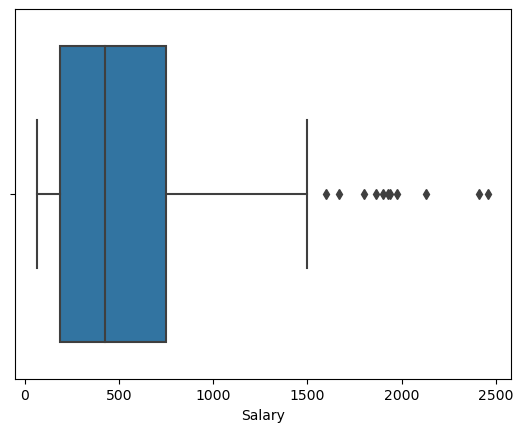

In [13]:
# Boxplot
sns.boxplot(df["Salary"])
plt.show()

## IV. Preparing For Data Modeling

### Analysis of Categorical Variables

In [14]:
# Importing categorical variables into dummy variable format
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [15]:
# y : The dependent variable
y = df["Salary"]

In [16]:
# Avoid falling into the dummy variable trap
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [17]:
# X : Independent variable
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


### Train - Test Split

Train dataset is split into test-train parts to be able to use in ML algorithms. 75% for training and 25% for testing

In [18]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


## V. Data Modelling

### 1.) K-Nearest Neighbors (KNN)

#### Modelling

In [19]:
# Create K-Nearest Neighbors Models
knn_model = KNeighborsRegressor()

In [20]:
# Fit the models
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

#### Prediction

In [21]:
# Make prediction using test data
y_pred = knn_model.predict(X_test)

In [22]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

#### Model Tuning

In [23]:
# Finding parameters for model
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [24]:
# Create K-Nearest Neighbors Models
knn = KNeighborsRegressor()

In [25]:
# Creating object of model using cross validation ( CV ) method
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [26]:
# Fit to the data
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [27]:
# Finding best parameters for model
knn_cv_model.best_params_["n_neighbors"]

8

In [28]:
# Creating a model object based on the best parameter value I found through the tuned model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [29]:
# Fit to the tuned data
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [30]:
# Make prediction using test data the tuned model
y_pred = knn_tuned.predict(X_test)

In [31]:
# Calculate rmse error for test set based on tuned value
knn_rmse_score = np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))
knn_rmse_score

413.7094731463598

### 2.) Non-Linear Support Vector Regression (Non-SVR)

#### Modelling

In [32]:
# Create Non-Linear Support Vector Regression Models
svr_rbf = SVR(kernel = "rbf")

In [33]:
# Fit the models
svr_rbf.fit(X_train, y_train)

SVR()

#### Prediction

In [34]:
# Make prediction using test data
y_pred = svr_rbf.predict(X_test)

In [35]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

#### Model Tuning

In [36]:
# Finding parameters for model
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}

In [37]:
# Creating object of model using cross validation ( CV ) method
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)

In [38]:
# Fit to the data
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [39]:
# Finding best parameters for model
pd.Series(svr_cv_model.best_params_)[0]

50

In [40]:
# Creating a model object based on the best parameter value I found through the tuned model
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0])

In [41]:
# Fit to the tuned data
svr_tuned.fit(X_train, y_train)

SVR(C=50)

In [42]:
# Make prediction using test data the tuned model
y_pred = svr_tuned.predict(X_test)

In [43]:
# Calculate rmse error for test set based on tuned value
non_svr_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
non_svr_rmse_score

428.00406888095694

### 3.) Multiple Layer Perception(MLP) / Artificial Neural Network (ANN)

#### Modelling

In [44]:
# Standard Scaler Operation
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
# Standardization for the training set
X_train_scaled = scaler.transform(X_train)

In [46]:
# Standardization for the testing set
X_test_scaled = scaler.transform(X_test)

In [47]:
# Create Artificial Neural Network Models
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20))

In [48]:
# Fit the models
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 20))

#### Prediction

In [49]:
# Make prediction using test data
y_pred = mlp_model.predict(X_test_scaled)

In [50]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

474.48609361344

#### Model Tuning

In [51]:
# Finding parameters for model
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [52]:
# Creating object of model using cross validation ( CV ) method
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [53]:
# Fit to the data
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [54]:
# Finding best parameters for model
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [55]:
# Creating a model object based on the best parameter value I found through the tuned model
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,50,150)).fit(X_train_scaled, y_train)

In [56]:
# Fit to the tuned data
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(100, 50, 150))

In [57]:
# Make prediction using test data the tuned model
y_pred = mlp_tuned.predict(X_test_scaled)

In [58]:
# Calculate rmse error for test set based on tuned value
mlp_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_rmse_score

358.7882239380015

### 4.) Classification and Regression Trees (CART)

#### Modelling

In [59]:
# Create Classification and Refression Trees Models
cart_model = DecisionTreeRegressor()

In [60]:
# Fit the models
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### Prediction

In [61]:
# Make prediction using test data
y_pred = cart_model.predict(X_test)

In [62]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

519.5547455278268

#### Model Tuning

In [63]:
# Finding parameters for model
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [64]:
# Creating object of model using cross validation ( CV ) method
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [65]:
# Fit to the data
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [66]:
# Finding best parameters for model
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [67]:
# Creating a model object based on the best parameter value I found through the tuned model
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [68]:
# Fit to the tuned data
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [69]:
# Make prediction using test data the tuned model
y_pred = cart_tuned.predict(X_test)

In [70]:
# Calculate rmse error for test set based on tuned value
cart_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
cart_rmse_score 

376.39788207109865

### 5.) Bagged Trees Regresyon (Bootstrap Aggregation)

#### Modelling

In [71]:
# Create Bagged Trees Regresyon Models
bag_model = BaggingRegressor(bootstrap_features = True)

In [72]:
# Fit the models
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

#### Prediction

In [73]:
# Make prediction using test data
y_pred = bag_model.predict(X_test)

In [74]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

349.2481718004355

#### Model Tuning

In [75]:
# Finding parameters for model
bag_params = {"n_estimators": range(2,20)}

In [76]:
# Creating object of model using cross validation ( CV ) method
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [77]:
# Fit to the data
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [78]:
# Finding best parameters for model
bag_cv_model.best_params_

{'n_estimators': 8}

In [79]:
# Creating a model object based on the best parameter value I found through the tuned model
bag_tuned = BaggingRegressor( n_estimators = 8, random_state = 45)

In [80]:
# Fit to the tuned data
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=8, random_state=45)

In [81]:
# Make prediction using test data the tuned model
y_pred = bag_tuned.predict(X_test)

In [82]:
# Calculate rmse error for test set based on tuned value
bag_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
bag_rmse_score 

364.6177857844092

### 6.) Random Forests (RF)

#### Modelling

In [83]:
# Create Random Forests Models
rf_model = RandomForestRegressor(random_state = 42)

In [84]:
# Fit the models
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Prediction

In [85]:
# Make prediction using test data
y_pred = rf_model.predict(X_test)

In [86]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

#### Model Tuning

In [87]:
# Finding parameters for model
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [88]:
# Creating object of model using cross validation ( CV ) method
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [89]:
# Fit to the data
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [90]:
# Finding best parameters for model
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [91]:
# Creating a model object based on the best parameter value I found through the tuned model
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [92]:
# Fit to the tuned data
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [93]:
# Make prediction using test data the tuned model
y_pred = rf_tuned.predict(X_test)

In [94]:
# Calculate rmse error for test set based on tuned value
rf_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rf_rmse_score

348.92573923036576

### 7.) Gradient Boosting Machines (GBM)

#### Modelling

In [95]:
# Create Gradient Boosting Machines Models
gbm_model = GradientBoostingRegressor()

In [96]:
# Fit the models
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

#### Prediction

In [97]:
# Make prediction using test data
y_pred = gbm_model.predict(X_test)

In [98]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

355.2014100191102

#### Model Tuning

In [99]:
# Finding parameters for model
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [100]:
# Creating object of model using cross validation ( CV ) method
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [101]:
# Fit to the data
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [102]:
# Finding best parameters for model
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [103]:
# Creating a model object based on the best parameter value I found through the tuned model
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

In [104]:
# Fit to the tuned data
gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [105]:
# Make prediction using test data the tuned model
y_pred = gbm_tuned.predict(X_test)

In [106]:
# Calculate rmse error for test set based on tuned value
gbm_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_rmse_score

342.2964083620977

### 8.) Extreme Gradient Boosting (XGBoost)

#### Modelling

In [107]:
# Create  Extreme Gradient Boosting Models
xgb_model = XGBRegressor()

In [108]:
# Fit the models
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Prediction

In [109]:
# Make prediction using test data
y_pred = xgb_model.predict(X_test)

In [110]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

#### Model Tuning

In [111]:
# Finding parameters for model
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [112]:
# Creating object of model using cross validation ( CV ) method
xgb_cv = GridSearchCV(xgb_model, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

In [113]:
# Fit to the data
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estima

In [114]:
# Finding best parameters for model
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [115]:
# Creating a model object based on the best parameter value I found through the tuned model
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 500)

In [116]:
# Fit to the tuned data
xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [117]:
# Make prediction using test data the tuned model
y_pred = xgb_tuned.predict(X_test)

In [118]:
# Calculate rmse error for test set based on tuned value
xgb_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_rmse_score

346.0275204366939

### 9.) Light Gradient Boosting Machines (Light GBM)

#### Modelling

In [119]:
# Create Light Gradient Boosting Machines Models
lgbm = LGBMRegressor()

In [120]:
# Fit the models
lgbm_model = lgbm.fit(X_train, y_train)

#### Prediction

In [121]:
# Make prediction using test data
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [122]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

#### Model Tuning

In [123]:
# Finding parameters for model
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] 
}

In [124]:
# Creating object of model using cross validation ( CV ) method
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [125]:
# Fit to the data
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [126]:
# Finding best parameters for model
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [127]:
# Creating a model object based on the best parameter value I found through the tuned model
lgbm_tuned = LGBMRegressor(colsample_bytree = 0.5,
                           learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20)

In [128]:
# Fit to the tuned data
lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [129]:
# Make prediction using test data the tuned model
y_pred = lgbm_tuned.predict(X_test)

In [130]:
# Calculate rmse error for test set based on tuned value
lgbm_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_rmse_score

375.6085209015434

### 10.) Category Boosting (CatBoost)

#### Modelling

In [131]:
# Create Category Boosting Models
catb = CatBoostRegressor()

In [132]:
# Fit the models
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 143ms	remaining: 2m 22s
1:	learn: 431.3923642	total: 145ms	remaining: 1m 12s
2:	learn: 424.8820360	total: 146ms	remaining: 48.6s
3:	learn: 418.2514904	total: 148ms	remaining: 36.8s
4:	learn: 412.6394021	total: 149ms	remaining: 29.7s
5:	learn: 406.6247020	total: 151ms	remaining: 25s
6:	learn: 400.5321206	total: 152ms	remaining: 21.6s
7:	learn: 394.6683437	total: 154ms	remaining: 19.1s
8:	learn: 388.2496484	total: 156ms	remaining: 17.2s
9:	learn: 382.9448842	total: 158ms	remaining: 15.6s
10:	learn: 377.2600080	total: 159ms	remaining: 14.3s
11:	learn: 372.4829606	total: 161ms	remaining: 13.2s
12:	learn: 366.6823437	total: 162ms	remaining: 12.3s
13:	learn: 362.6076230	total: 165ms	remaining: 11.6s
14:	learn: 358.0107745	total: 166ms	remaining: 10.9s
15:	learn: 353.2802665	total: 168ms	remaining: 10.3s
16:	learn: 348.5646265	total: 170ms	remaining: 9.83s
17:	learn: 343.6407912	total: 173ms	remaining: 9.42s
18:	learn: 339.2363847	tot

#### Prediction

In [133]:
# Make prediction using test data
y_pred = catb_model.predict(X_test)

In [134]:
# Calculate RMSE score using test data
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

#### Model Tuning

In [135]:
# Finding parameters for model
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [136]:
# Creating object of model using cross validation ( CV ) method
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [137]:
# Fit to the data
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 2.42ms	remaining: 2.41s
1:	learn: 404.1864276	total: 5.59ms	remaining: 2.79s
2:	learn: 386.3231718	total: 7.85ms	remaining: 2.61s
3:	learn: 370.5548032	total: 9.93ms	remaining: 2.47s
4:	learn: 354.9242038	total: 12ms	remaining: 2.39s
5:	learn: 342.3403984	total: 14.1ms	remaining: 2.34s
6:	learn: 328.2370070	total: 15.7ms	remaining: 2.23s
7:	learn: 317.5056526	total: 18.3ms	remaining: 2.27s
8:	learn: 306.6243511	total: 20ms	remaining: 2.2s
9:	learn: 297.3147023	total: 21.6ms	remaining: 2.14s
10:	learn: 288.3685892	total: 23.5ms	remaining: 2.12s
11:	learn: 281.0996220	total: 25.8ms	remaining: 2.12s
12:	learn: 273.2254898	total: 28.6ms	remaining: 2.17s
13:	learn: 266.9003385	total: 30.5ms	remaining: 2.15s
14:	learn: 261.9092500	total: 32.1ms	remaining: 2.11s
15:	learn: 256.2637350	total: 33.9ms	remaining: 2.08s
16:	learn: 250.3667935	total: 35.4ms	remaining: 2.05s
17:	learn: 244.8631098	total: 37ms	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D9F7A88E50>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [138]:
# Finding best parameters for model
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [139]:
# Creating a model object based on the best parameter value I found through the tuned model
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.1, 
                               depth = 5)

In [140]:
# Fit to the tuned data
catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 422.4143448	total: 1.6ms	remaining: 1.6s
1:	learn: 404.1864276	total: 3.15ms	remaining: 1.57s
2:	learn: 386.3231718	total: 4.44ms	remaining: 1.48s
3:	learn: 370.5548032	total: 5.77ms	remaining: 1.44s
4:	learn: 354.9242038	total: 7.08ms	remaining: 1.41s
5:	learn: 342.3403984	total: 8.34ms	remaining: 1.38s
6:	learn: 328.2370070	total: 9.7ms	remaining: 1.38s
7:	learn: 317.5056526	total: 11ms	remaining: 1.36s
8:	learn: 306.6243511	total: 12.2ms	remaining: 1.35s
9:	learn: 297.3147023	total: 13.5ms	remaining: 1.33s
10:	learn: 288.3685892	total: 14.9ms	remaining: 1.34s
11:	learn: 281.0996220	total: 16.2ms	remaining: 1.33s
12:	learn: 273.2254898	total: 17.5ms	remaining: 1.33s
13:	learn: 266.9003385	total: 18.7ms	remaining: 1.32s
14:	learn: 261.9092500	total: 19.9ms	remaining: 1.3s
15:	learn: 256.2637350	total: 21ms	remaining: 1.29s
16:	learn: 250.3667935	total: 22.3ms	remaining: 1.29s
17:	learn: 244.8631098	total: 23.8ms	remaining: 1.3s
18:	learn: 240.1540669	total: 25.2ms	remaining:

In [141]:
# Make prediction using test data the tuned model
y_pred = catb_tuned.predict(X_test)

In [142]:
# Calculate rmse error for test set based on tuned value
catb_rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
catb_rmse_score

356.665762904938

## VI. Model Evaluation

In [143]:
# Comparison of rmse number
model_ev = pd.DataFrame({"Model": ["K-Nearest Neighbour","Nonlinear Support Vector Regression","Multiple Layer Perception","Classification and Regression Trees","Bagged Trees Regression","Random Forests","Gradient Boosting Machines","Extreme Gradient Boosting","Light Gradient Boosting Machines","Category Boosting"],
                         "RMSE": [knn_rmse_score,non_svr_rmse_score,mlp_rmse_score,cart_rmse_score,bag_rmse_score,rf_rmse_score,gbm_rmse_score,xgb_rmse_score,lgbm_rmse_score,catb_rmse_score]})
model_ev

,Model,RMSE
0,K-Nearest Neighbour,413.709473
1,Nonlinear Support Vector Regression,428.004069
2,Multiple Layer Perception,358.788224
3,Classification and Regression Trees,376.397882
4,Bagged Trees Regression,364.617786
5,Random Forests,348.925739
6,Gradient Boosting Machines,342.296408
7,Extreme Gradient Boosting,346.027520
8,Light Gradient Boosting Machines,375.608521
9,Category Boosting,356.665763


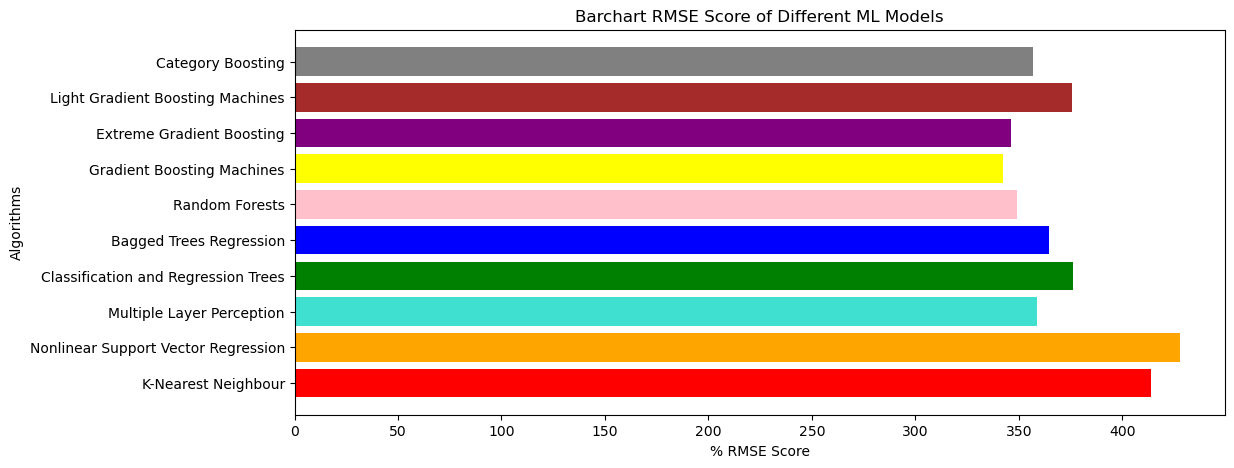

In [144]:
# Barchart RMSE of Different ML Models
colors = ["red","orange","turquoise","green","blue","pink","yellow","purple","brown","grey"]
plt.figure(figsize = (12,5))
plt.title("Barchart RMSE Score of Different ML Models")
plt.xlabel("% RMSE Score")
plt.ylabel("Algorithms")
plt.barh(model_ev["Model"],model_ev["RMSE"],color = colors)
plt.show;

**Comparison of Models**
* As a result of the comparison, our model with the lowest, that is, the most vermilion, is **Gradient Boosting Machines (GBM)** with RMSE = 342.296408.

**Conclusion:** Best Algorithm is **Gradient Boosting Machines (GBM)**